# What factors affect a person's commitment to honoring his/her Doctor's appointment?

<a id='intro'></a>
## Introduction

> Alot of times, people go to hospitals owing to concerns about their health. They appear to be badly in need medical attention but, right after booking appointments, they don't show up for it. What could be responsible for this? In order to understand this phenomena, we've picked a case study with dataset. This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patients are
included in each row.
>
>● **‘PatientId’** unique number code identifying each patient.
>
>● **‘AppointmentID’** unique identifier used to track details of a patient's appointment.
>
>● **‘Gender’** pretty straight forward - sex of patient - Male(M) or Female(F).
>
>● **‘ScheduledDay’** tells us on
what day the patient set up their
appointment.
>
>● **‘AppointmentDay’** tells us on what day the patient was billed to see the Doctor.
>
>● **‘Age’** how old the patient was as at the time of taking data.
>
>● **‘Neighborhood’** indicates the
location of the hospital.
>
>● **‘Scholarship’** indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
>
>● **‘Hipertension’** is the patient hypertensive? 1 - Yes, 0 - No.
>
>● **‘Diabetes’** is the patient diabetic? 1 - Yes, 0 - No.
> 
>● **‘Alcoholism’** does the patient suffer alcoholism? 1 - Yes, 0 - No.
>
>● **‘Handcap’** is the patient handicapped? 1 - Yes, 0 - No.
>
>● **‘SMS_received’** did the patient receive a notification SMS prior to appointment day?
>
>● **‘No-show’** did the patient not show up for his/her appointment? Yes - patient missed appointment, No - patient didn't miss.
>
>● **‘App-kept’** replacement for No-show above. Did the patient keep his/her appointment? 1 - Yes. 0 - No.
>
>● **‘Wait_time’** length of time a patient has to wait, right after scheduling, before seeing a Doctor.
>
>● **‘Conditions_total’** total number of conditions suffered by a patient. Value ranges from 1 to 4.
>
>
## Questions
> 1. What percentage of  the people kept their doctor's appointment?
>
> 2. Does a longer or shorter wait time predict whether or not a patient would keep his/her Doctor's appointment?
>
> 3. Did patients that suffer more than 1 medical condition rate higher on keeping appointments than those that suffered less?
>
> 4. Did patients with unspecified medical conditions have a higher rate of keeping Doctor's appointments than those with recorded conditions?
>
> 5. Which of the conditions had the highest number of sufferers?
>

In [1]:
# First, we import all necessary libraries - pandas, numpy, matplotlib and seaborn.

import pandas as pd # To understand the data structure.
import numpy as np # Numerical python for arrays.
import matplotlib.pyplot as plt # Need graphs?
import seaborn as sns # Some visuals even more stunning?

%matplotlib inline


Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. (Source: Pandas Documentation)

NumPy is the fundamental package for scientific computing in Python. (Source: Numpy Documentation)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. (Source: Matplotlib Documentation)

Seaborn is a Python data visualization library based on matplotlib. (Source: Seaborn Documentation)

Matplotlib inline causes visualizations to be displayed right beneath their codes.

<a id='wrangling'></a>
## Data Wrangling

> **Basics**: Here, we bring our data on screen, have a first look, then very keen look at it. We inspect for cleanliness, we trim and we clean. We want those figures polished and ready to be analyzed with ease.


### General Properties

In [2]:
df_app = pd.read_csv('no_show.csv') # Our Data frame.
df_app.head(10) # A look at first 10 rows.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


*Generating data frame for our data, using provided csv file of course. Then, we'll check out data types and seek out missing, duplicated or erroneously recorded data.*

***Thoughts***
>
>- Can't unsee typos in column headings - *Hipertension* and *Handcap*.
>- There exist people with no "reported" medical conditions that did or did not keep their appointments. They'll be treated as healthy people. Not everyone who visits a doctor is sick anyway. 
>- The *No-show* column is super confusing. *'No'* is appointment kept, *'Yes'* is appointment not kept.
>- Patient Ids look super weird and the dates look even weirder. Can't seem to make any sense out of the "T" and "Zees."
>
*We'll see what else we can find...*

In [3]:
df_app.shape # Dimensions of our data

(110527, 14)

>- 110527 rows, 14 columns. *That's 110527 scheduled Doctor's appointments of people with zero, 1 or more "reported" medical conditions that did or did not see the doctor.*

In [4]:
df_app.describe() # Some statistics.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>- *There is a negative showing up in the age column (-1). That's an impossible figure.* 
>- *I wonder why *No-show* can't come in 1s and zeros like the rest of the columns beside it. They all obviously mean 1 - Yes, and 0 - No.* 

*But are those only issues? We probe even further...*

In [5]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


***Empty cell/missing data in any of the columns? Type of data each column holds?***

>- *See that? 110527 non-null (non-empty) cells in each column. That figure also equals the number of our rows from earlier, right? No missing data in any of the cells then.*
>- *Instances of inconsistent data types - PatientId, appointmentID (both should be strings). ScheduledDay and AppointmentDay too ought to be converted to readable date-time format.*
>
*What else is there?*

In [6]:
df_app.duplicated().sum() # Any instances of duplicate data?

0

>- None! No duplicate data!
>
*Perhaps, time for some visualization...*

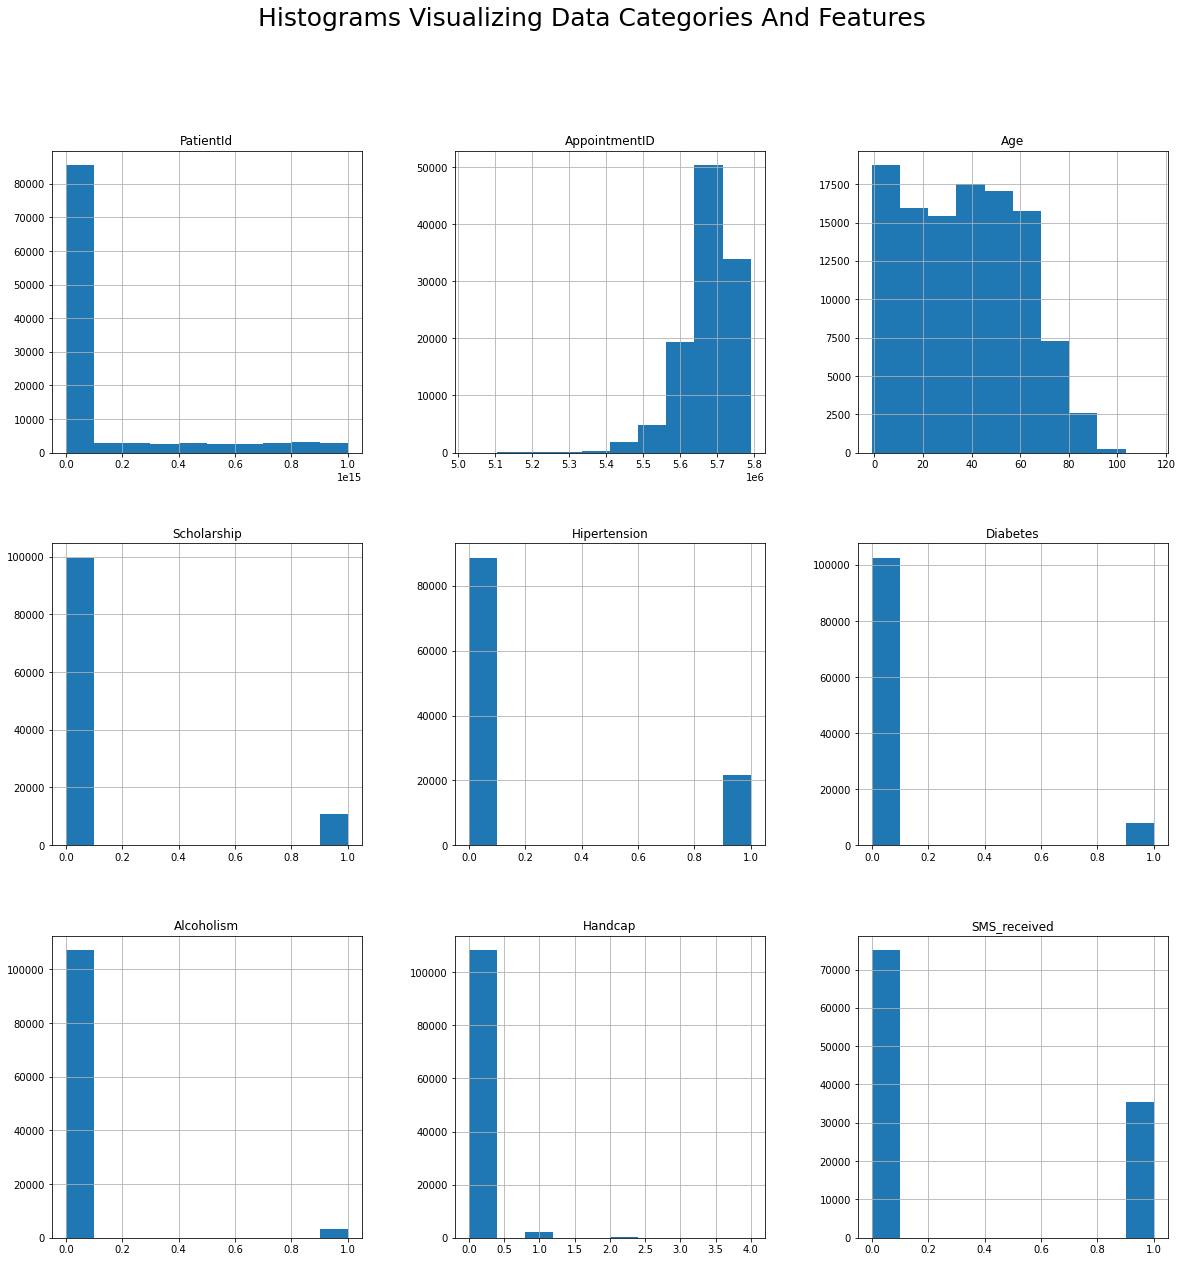

In [7]:
df_app.hist(figsize=(20,20)) # histograms..
plt.suptitle('Histograms Visualizing Data Categories And Features', fontsize=25); # title plus readable font size.

***Plot various Histograms based on generated dataframe. Size - 20 by 20***
>- People between the ages of 0 and 20 booked the most appointments.
>- Most of the appointments booked weren't by people on scholarship.
>- Majority of the patients were not hipertensive.
>- There is a very low incidence of Diabetes, Alcoholism and Handcap amongst them.
>- Most of the people did not receive sms.
>- All bar charts, except appointment ID, are heavily skewed to the right.
>
*As at this point, visualizations do not offer much reliable details because the data isn't yet clean. So, lets get down to that...*

### Data Cleaning Stage
>
>
> **Basics**: Consistency of data is key in Analytics. Inconsistent, incorrect or unavailable data could cost dreams. Here, we bring to fore each of the issues identified in the wrangling stage. We then fix each one after the other.
>
>
>
> **What to expect** 
>   
>    We will fix issues with:
>
>- Typos in column headings - "Hipertension" and "Handcap."
>- Super confusing "No-show" column. Not in 1s and zeros like the rest of the columns beside it.
>- Instances of inconsistent data types. Patient Ids look super weird and the dates look even weirder.
>- Negative (-1) showing up in the age column.
>
>
>   *shall we do some cleaning?*

#### Correcting typos in column headings and renaming

In [8]:
# Correcting typos... renaming... 
df_app = df_app.rename(columns={"Hipertension":"Hypertension", "Handcap":"Handicap", "No-show":"App-kept"})

*Correcting the typos in column headings and renaming the "No-show" as "App-kept" to indicate whether or not Appointment was kept.*

#### Replacing "Yes" with 0 and "No" with 1 in App-kept column

In [9]:
df_app.loc[df_app["App-kept"] == "Yes", "App-kept"] = 0 # Yes is 0
df_app.loc[df_app["App-kept"] == "No", "App-kept"] = 1 # No is 1

*Consistency of data is of extreme importance in Analytics. So, we replace "Yes" with 0 and "No" with 1 to keep the values of the column consistent with the rest beside it.*

In [10]:
df_app["App-kept"].head(10) #Quick check..

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    1
Name: App-kept, dtype: object

>   *Checking first 10 rows of the renamed column (App-kept) to be sure it worked.*
>
*But the datatype is suspect so...*

#### Fixing data types

In [11]:
df_app["App-kept"] = df_app["App-kept"].apply(pd.to_numeric)

*Convert datatype to numeric*

In [12]:
df_app["App-kept"].dtype # Check datatype

dtype('int64')

*Checking datatype of the column to see if it worked.*

In [13]:
df_app['PatientId'] = df_app['PatientId'].astype(str) # to strings
df_app['AppointmentID'] = df_app['AppointmentID'].astype(str) # to strings

*Converting PatientId and AppointmentID datatypes to string to maintain consistency.*

In [14]:
df_app["ScheduledDay"] = pd.to_datetime(df_app["ScheduledDay"]) # to date-time
df_app["AppointmentDay"] = pd.to_datetime(df_app["AppointmentDay"]) # to date-time

*Fixing super weird dates... getting rid of the "Tees" and "Zees." Converting ScheduledDay datatype to Date time format and AppointmentDay to same (Date time)....*

In [15]:
df_app.dtypes

PatientId                      object
AppointmentID                  object
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
App-kept                        int64
dtype: object

>  *Yes! all datatypes in order...*

 *Lets fix that negative age issue now...*

#### Handling negative values

In [16]:
(df_app['Age'].values < 0).sum() # First, we check whether or not there are more negative age values besides the -1.

1

*Oh... its just that 1 negative value (-1)... interesting...*

In [17]:
df_app.query('Age == "-1"') # Lets find the row carrying the -1 age value.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept


*Row number 99832... every other thing around here, except for age, seems to be in order. OK. We begin fixing it.*

In [18]:
df_app['Age'] = df_app['Age'].apply(lambda x : x if x > 0 else None) #First, we fill the cell with a nan value...

*Yes... we aren't dropping the entire row because its got a lot of int data types. What we'll eventually do is, fill the cell with the mean age of the distribution. But first, we fill with none value. Having done that, we query for -1 again.*

In [19]:
df_app.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept


*Awesome... -1 is gone, so, it worked. We move to finding the mean age...*

In [20]:
mean_age = df_app['Age'].mean().astype(int) # Find mean age and convert to int datatype.
mean_age

38

In [21]:
df_app['Age'].fillna(mean_age, inplace=True) # Fill none cell with mean age.

*fillna function basically fills cells housing none values. In this case, we're filling with our calculated mean (38).*

In [22]:
df_app.iloc[[99831, 99832]] # Calling up rows 99831 and 99832 to see if all went well. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept
99831,98251782773783.0,5774337,M,2016-06-06 08:08:00+00:00,2016-06-06 00:00:00+00:00,7.0,CRUZAMENTO,0,0,0,0,0,0,1
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,38.0,ROMÃO,0,0,0,0,0,0,1


*Ok... it worked... but the Age column now appears as a string, instead of int. Lets fix that.*

#### Other cleaning issues arising

In [23]:
df_app['Age'].astype(int) # Convert Age column to int datatype.

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int32

*Awesome! So...*

>***Summary Of Cleaning Stage***
>
>- *Corrected typos in column headings and renamed "No-show" as "App-kept" to indicate whether or not Appointment was kept.*
>
>- *Changed the "Yes(es)" in App-kept to 0 and the "No(s)" to 1, to maintain consistency with other variables close to it.*
>
>- *Fixed issues with data types. Converted App-kept to numeric, PatientId & AppointmentID to strings, ScheduledDay and AppointmentDay to date-time.*
>
>- *Handled Negative values - the -1 in Age. First, filled the cell with nan. Then, filled with mean age of the distribution.*
>
>- *Other cleaning issue(s) - Converted Age column back to int as it came out as strings after previous operation.*
>
*That done... lets go explore!*

<a id='eda'></a>
## Exploratory Data Analysis

> **Basics**: Data always yearn to tell stories, but only those who diligently search are rewarded with these tales. We began with wrangling and cleaning, this is the part our data communicates with us. And we unravel these communication by posing various questions related to our variables. As we do this, we are drawn into computing statistics, taking keen look at correlations between variables and painting vivid pictures in form of visualizations. This is exploratory data analysis.
>
> Quickly to the first question...

### 1. What percentage of the people kept their Doctor's appointment?

In [24]:
df_app['App-kept'].value_counts() # Get value counts of "App-kept"

1    88208
0    22319
Name: App-kept, dtype: int64

*To answer this, we first need a value count of kept and unkept appointments. Afterwards, we call a function to find the percentages.*

In [25]:
df_app['App-kept'].value_counts().sum() # Get sum of value counts to be sure we're on track. 

110527

*Interesting... out of 110527 appointments, 88208 were kept, 22319 weren't. Lets go find the percentages.*

In [26]:
df_app['App-kept'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' # Percentage value counts.

1    79.8%
0    20.2%
Name: App-kept, dtype: object

*Get the value counts in rates, multiply by 100, round up to 1 place, convert to str datatype and add percentage symbols to them.*
                                                                                    

>
>- *79.8 percent of people kept their appointments.*
>- *20.2 percent didn't.*

### 2. Does a longer or shorter wait time predict whether or not a patient would keep his/her Doctor's appointment?

In [27]:
# Subsetting... calling up needed columns. 
df_app[["ScheduledDay","AppointmentDay","App-kept"]].head()

,ScheduledDay,AppointmentDay,App-kept
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,1


*ScheduledDay and AppointmentDay are the only "time columns" we've got. We compare them against "App-kept". But it looks like we need to get a "Wait_time" column. The idea is to compare average wait times between kept and unkept appointments. So...*

In [28]:
df_app['Wait_time'] = df_app['AppointmentDay'].dt.day - df_app['ScheduledDay'].dt.day 

*Create "Wait_time" column by finding difference between AppointmentDay and ScheduledDay columns and converting to strictly "days format".*

In [29]:
df_app['Wait_time'].head() # checking to see if it worked.

0    0
1    0
2    0
3    0
4    0
Name: Wait_time, dtype: int64

*Great! Now, lets see how our days appear*

In [30]:
df_app['Wait_time'].unique() # Call up every unique value under "Wait_time" column.

array([  0,   2,   3,   1,   4,   9,  -2,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  12,  -1,  25,   8,   6,   7,  13,
        19,   5,  27,  26,  20, -28,  -8, -24, -27, -18, -17, -12, -14,
       -25, -26, -16,  -6,  -4, -23,  -9, -20, -21,  -3, -10, -11,  -5,
       -19, -15, -13,  -7, -22, -29,  29,  30, -30], dtype=int64)

*Okay... there's a problem. Some values carry negative signs. Probably due to how the data was recorded, in a count down style. Can't possibly drop all those values though. So, what do we do?*

In [31]:
df_app['Wait_time'][df_app['Wait_time'] < 0] = -df_app['Wait_time']

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_14135/1387207215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Wait_time'][df_app['Wait_time'] < 0] = -df_app['Wait_time']


*Make a subset of Wait_times that are less than zero and multiply each value of the subset by -1 to cancel out the negatives.*

In [32]:
df_app['Wait_time'].unique()

array([ 0,  2,  3,  1,  4,  9, 10, 23, 11, 18, 17, 14, 28, 24, 21, 15, 16,
       22, 12, 25,  8,  6,  7, 13, 19,  5, 27, 26, 20, 29, 30],
      dtype=int64)

*Lets see if it worked...run the unique "Wait_time" identifier code again...Amazing!*

In [33]:
df_w = df_app.groupby('App-kept').mean()['Wait_time'] 
df_w

App-kept
0    9.391147
1    5.809768
Name: Wait_time, dtype: float64

*Now, lets group by average wait times and appointment kept.*

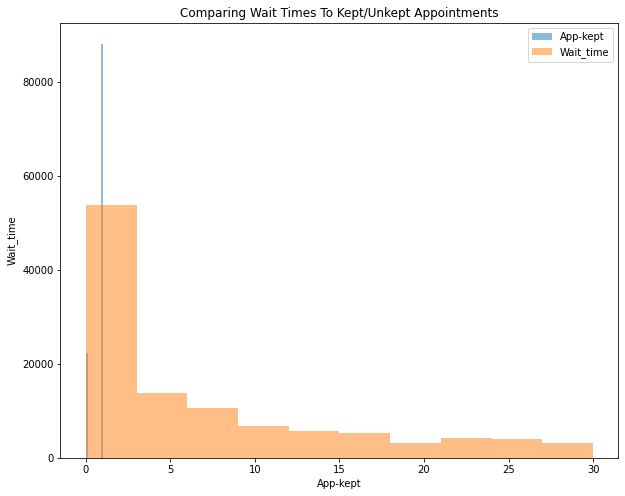

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df_app['App-kept'], alpha=0.5, label='App-kept')
ax.hist(df_app['Wait_time'], alpha=0.5, label='Wait_time')
ax.set_title('Comparing Wait Times To Kept/Unkept Appointments')
ax.set_xlabel('App-kept')
ax.set_ylabel('Wait_time')
ax.legend(loc='upper right')
plt.show();

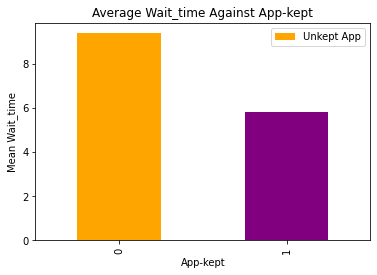

In [35]:
hint = ["Unkept App", "Kept App"]
plt.xlabel('App-kept')
plt.ylabel('Mean Wait_time')
plt.title("Average Wait_time Against App-kept")
df_w.plot.bar(color=('orange', 'purple'))
plt.legend(hint, loc='best')

>- *People that waited an average of 9 days were more likely to not keep their appointments.*
>
>- *People that had to wait an average of 5-6 days were more likely to keep their appointments.*

### 3. Did patients that suffer more than 1 medical condition rate higher on keeping appointments than those that suffered less?

In [36]:
df_app['Conditions_total'] = df_app['Hypertension'] + df_app['Diabetes'] + df_app['Alcoholism'] + df_app['Handicap']

*For this, we need another new column to house each row total of the four listed conditions...after this, we'll take value counts of each condition and compare against the App-kept column. So, lets call the new column, "Conditions_total", it is a cummulative of all four columns listing the conditions...*

In [37]:
df_app.iloc[[]] # Calling up only column headers.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept,Wait_time,Conditions_total


*Is it created? We call up only the row carrying headers to confirm. We move on to value counts next...*

In [38]:
df_app['Conditions_total'].value_counts() # Create a subset for Conditions_total and find its value counts.

0    84115
1    18014
2     7710
3      624
4       63
5        1
Name: Conditions_total, dtype: int64

*Ok... there's a problem. We got a total of 4 recorded conditions coded in 1s and 0s. Meaning, we can't have Conditions_total greater than 4. However, one of the "Conditions_total" above shows 5... what do we do?*

In [39]:
df_app.query('Conditions_total == "5"') # First we find the errant cell by querying "5" under "Conditions_total".

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept,Wait_time,Conditions_total


*Ah... there it is, Conditions_total (5). The "Handicap" column is set to 2, with each of Diabetes, Alcoholism and Hypertension set to 1 respectively. Reason, we got a total of 5. Perhaps, if we adjust the obviously errant cell (Handicap), the Conditions_total would automatically re-adjust itself? Lets try...*

In [40]:
mean_Handicap = df_app['Handicap'].mean().astype(int) # Find mean of Handicap values and convert to int datatype.
mean_Handicap

0

*We'll attempt to replace the the errant value with the mean of the "Handicap" column. The mean is 0, now we go on to replace 2 with 0.*

In [41]:
df_app['Handicap'] = df_app['Handicap'].astype(str).str.replace("2","0").astype(int)

*Convert Handicap column to str type data. Then, from the str types, replace "2" with 0 and convert column back to int. Hoping this works to not only replace the 2, but also to auto-readjust the Conditions_total back to an acceptable value.*

In [42]:
df_app.iloc[[5424]]  # Calling up that row (5424) again to confirm...

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept,Wait_time,Conditions_total
5424,1647279714116.0,5647342,M,2016-05-02 13:24:36+00:00,2016-05-04 00:00:00+00:00,65.0,SANTO ANDRÉ,0,1,1,1,0,0,0,2,5


*Ok... 2 in Handicap was replaced with 0... alright. But Conditions_total remain 5. Sad, but we'll have to manually replace the 5 with 3, which is obviously supposed to be the total.* 

In [43]:
df_app['Conditions_total'] = df_app['Conditions_total'].astype(str).str.replace("5","3").astype(int)

 *Convert Conditions_total column to str type data. Then, from the str type, replace "5" with "3" and convert column back to int.*

In [44]:
df_app.iloc[[5424]] # We'll take another look at that row 5424 now.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,App-kept,Wait_time,Conditions_total
5424,1647279714116.0,5647342,M,2016-05-02 13:24:36+00:00,2016-05-04 00:00:00+00:00,65.0,SANTO ANDRÉ,0,1,1,1,0,0,0,2,3


*Perfect! Conditions_total is now 3. Next... take value counts of "Conditions_total" again to confirm errant figure is out...so...*

In [45]:
df_app["Conditions_total"].value_counts() # Value counts

0    84115
1    18014
2     7710
3      625
4       63
Name: Conditions_total, dtype: int64

In [46]:
dfc_tot = df_app.loc[(df_app["Conditions_total"] > 0) & (df_app["App-kept"] >= 0), ["Conditions_total", "App-kept"]]

*Now, we move on to comparing comparing Conditions_total to App-kept. We basically first reference the subset "Conditions_total" greater than 0 against the "App-kept" subset greater than 0. This is so that we're able to rid ourselves of all rows carrying unspecified conditions.We then pass the resultant list onto a new dataframe (dfc_tot) to make it shorter for subsequent use.*

*And that was looong... pheeew!*

In [47]:
dfc_tot.value_counts().sum() # sum of value counts

26412

*This represents our sample size. Shortening the long line of code definitely got advantages.*

In [48]:
dfc_tot.value_counts() # Comparing value counts of lists housed inside the new dataframe.

Conditions_total  App-kept
1                 1           14781
2                 1            6346
1                 0            3233
2                 0            1364
3                 1             518
                  0             107
4                 1              51
                  0              12
dtype: int64

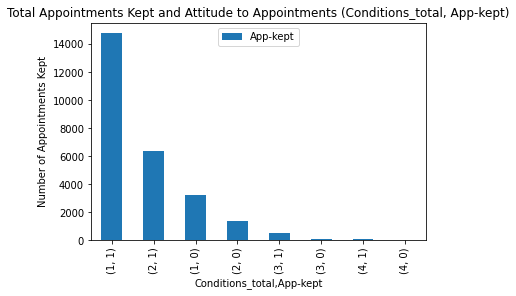

In [49]:
blu = ["App-kept"]
plt.title('Total Appointments Kept and Attitude to Appointments (Conditions_total, App-kept)')
plt.xlabel('Conditions Suffered, App-kept')
plt.ylabel('Number of Appointments Kept')
dfc_tot.value_counts().plot.bar()
plt.legend(blu, loc='upper center')

*Interesting... of all 26412 appointments, just 6346 appointments were kept by people that suffer up to 2 conditions. Those with up to 3 and 4 conditions that kept appointments are even much lower. All these as compared to 14781 appointments kept by people that suffered just 1 condition. Hmmm... lets see the percentages...* 

In [50]:
dfc_tot.value_counts(normalize=True).mul(100).round(2).astype(str) + '%' 

Conditions_total  App-kept
1                 1           55.96%
2                 1           24.03%
1                 0           12.24%
2                 0            5.16%
3                 1            1.96%
                  0            0.41%
4                 1            0.19%
                  0            0.05%
dtype: object

*Find the total value counts of the new dataframe (dfc_tot) in rates, multiply your answer by 100, round to 2 places of decimal, convert your result to str and add percentage symbols.*

>- *55.96 percent of the appointments were kept by people with just 1 condition.*
>
>- *24.03 percent of the appointments were kept by people with 2 condidtions.*
>
>- *People with 3 and 4 medical conditions kept just 1.96 and 0.19 percent of the appointments respectively.*

*But... is that the whole story?*

In [51]:
dfc_2 = df_app.loc[(df_app["Conditions_total"] == 2) & (df_app["App-kept"] >= 0), ["Conditions_total", "App-kept"]]

*Numbers can be tricky. How about we find the rates of appointment kept within each subgroup? That is, rate of appointment kept within those with just 2, 3, 4 conditions, within those with just 1 and within those with unspecified conditions. We begin by creating a new dataframe (dfc_2) for list of people with just 2 conditions that did or did not keep their appointments.*


In [52]:
dfc_2.value_counts().sum() # Sum of their total value counts.

7710

*Just 7710 were appointments booked for people with exactly 2 receorded medical conditions? Woah! Ok... lets see the breakdown first...*

In [53]:
dfc_2.value_counts() # Value counts of people with exactly 2 conditions that did or did not keep their appointments.

Conditions_total  App-kept
2                 1           6346
                  0           1364
dtype: int64

*Interesting... of a total of 7710 booked appointments, 6346 were actually kept.*
*But... noticed how all the figures are same as those we got from earlier?*
*Don't be mistaken though... the next cell paints an entirely different picture.*

In [54]:
dfc_2.value_counts(normalize=True).mul(100).round().astype(str) + '%' 

Conditions_total  App-kept
2                 1           82.0%
                  0           18.0%
dtype: object

*We'll take percentage of the value counts. So...take value counts of the new dataframe (dfc_2) in rates, multiply by 100, round it up to 0 decimal place, convert to str and add percentage symbols to the result.*

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


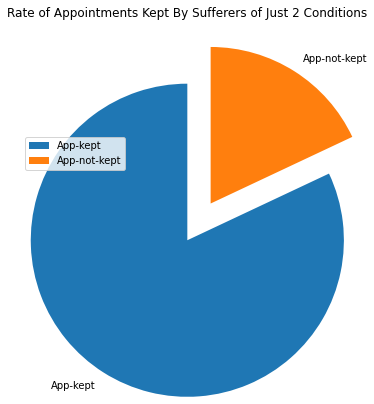

In [55]:
App_2 = dfc_2.value_counts(normalize=True).mul(100).round()
Pies = ["App-kept", "App-not-kept"]


plt.title("Rate of Appointments Kept By Sufferers of Just 2 Conditions", y=1.5)
plt.axis('equal'); 
explode = (0, 0.5)
plt.pie(App_2, radius=1.8, labels = Pies, startangle = 90, explode=explode)
plt.legend(Pies, loc="best");

>- *Amazing! Within the subset of people with exactly 2 recorded medical conditions, 82 percent of them kept their appointments. Just 18 percent of them didn't.*
>
*Lets see what we'll find with patients that suffered 3 or more conditions...*

In [56]:
dfc_3 = df_app.loc[(df_app["Conditions_total"] == 3) & (df_app["App-kept"] >= 0), ["Conditions_total", "App-kept"]]

*For those that suffered exactly 3 conditions... As usual, we create a new dataframe (dfc_3) to house lists of those with exactly 3 conditions and appointment kept.*


In [57]:
dfc_3.value_counts().sum() # Sum of value counts...

625

*Just 625 people in this group?*

In [58]:
dfc_3.value_counts() # Value counts...

Conditions_total  App-kept
3                 1           518
                  0           107
dtype: int64

*The breakdown... 518 of the 625 kept appointments. Just 107 didn't...*

In [59]:
dfc_3.value_counts(normalize=True).mul(100).round().astype(str) + '%' 

Conditions_total  App-kept
3                 1           83.0%
                  0           17.0%
dtype: object

*Percentages... express value counts in rates, multiply by 100, result in 0 decimal places, converted to str + percentage symbols.*


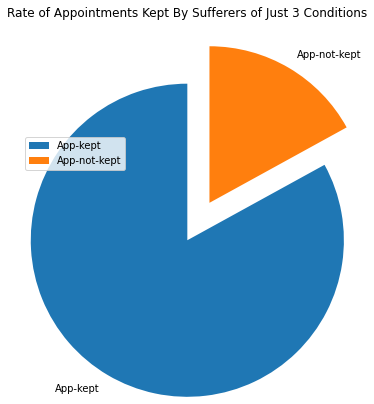

In [60]:
App_3 = dfc_3.value_counts(normalize=True).mul(100).round()
Pies = ["App-kept", "App-not-kept"]


plt.title("Rate of Appointments Kept By Sufferers of Just 3 Conditions", y=1.5)
plt.axis('equal'); 
explode = (0, 0.5)
plt.pie(App_3, radius=1.8, labels = Pies, startangle = 90, explode=explode)
plt.legend(Pies, loc="best");

>- *83 percent kept their appointments. 17 percent didn't.*

*What do we find within those with all 4 listed conditions?*

In [61]:
dfc_4 = df_app.loc[(df_app["Conditions_total"] == 4) & (df_app["App-kept"] >= 0), ["Conditions_total", "App-kept"]]

*Again, we create a new dataframe (dfc_4) to house our lists...*

In [62]:
dfc_4.value_counts().sum() # Our sum of value counts...

63

*63 people in total...*

In [63]:
dfc_4.value_counts() # Our breakdown...

Conditions_total  App-kept
4                 1           51
                  0           12
dtype: int64

*Just 51 kept their appointments. 12 didn't...*

In [64]:
dfc_4.value_counts(normalize=True).mul(100).round().astype(str) + '%' # Percentages...

Conditions_total  App-kept
4                 1           81.0%
                  0           19.0%
dtype: object

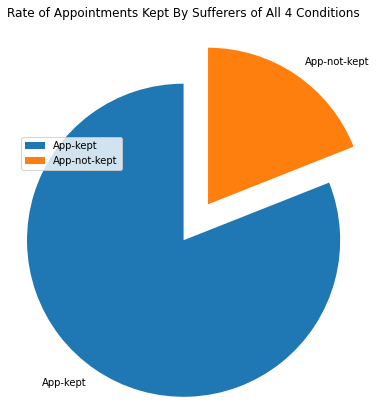

In [65]:
App_4 = dfc_4.value_counts(normalize=True).mul(100).round()
Pies = ["App-kept", "App-not-kept"]


plt.title("Rate of Appointments Kept By Sufferers of All 4 Conditions", y=1.5)
plt.axis('equal'); 
explode = (0, 0.5)
plt.pie(App_4, radius=1.8, labels = Pies, startangle = 90, explode=explode)
plt.legend(Pies, loc="best");

*Hmmm... the percentage of appointments kept dropped again...*
>
>- *Within the subset of those that suffered all conditions, 81 percent of them kept their appointments.*
>- *19 percent didn't keep.*
>
*How about those at the other side, the ones that suffered just 1 condition and less?*

In [66]:
dfc_1 = df_app.loc[(df_app["Conditions_total"] == 1) & (df_app["App-kept"] >= 0), ["Conditions_total", "App-kept"]]

*Here we go again... for suffers of just 1 condition... new dataframe create (dfc_1), pass lists to it...*

In [67]:
dfc_1.value_counts().sum() #Sum of value counts to see our sample size...

18014

*Sample size*

In [68]:
dfc_1.value_counts() # Breakdown of value counts... to see how the variables compare...

Conditions_total  App-kept
1                 1           14781
                  0            3233
dtype: int64

*14781 kept appointments. 3233 didn't.*

In [69]:
dfc_1.value_counts(normalize=True).mul(100).round().astype(str) + '%' # Rates converted to percentages in strings...

Conditions_total  App-kept
1                 1           82.0%
                  0           18.0%
dtype: object

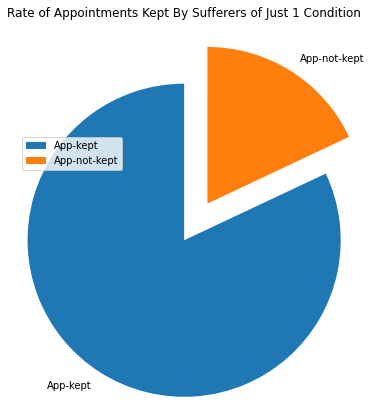

In [70]:
App_1 = dfc_1.value_counts(normalize=True).mul(100).round()
Pies = ["App-kept", "App-not-kept"]


plt.title("Rate of Appointments Kept By Sufferers of Just 1 Condition", y=1.5)
plt.axis('equal'); 
explode = (0, 0.5)
plt.pie(App_1, radius=1.8, labels = Pies, startangle = 90, explode=explode)
plt.legend(Pies, loc="best");

>- *82 percent of those with just 1 medical condition kept their appointments.*
>- *18 percent of them didn't keep their appointments.*
>
*And those with medical conditions unaccounted for?*

### 4. Did patients with unspecified medical conditions have a higher rate of keeping Doctor's appointments than those with recorded conditions?

In [71]:
# new dataframe create (dfc_0)... pass lists...

dfc_0 = df_app.loc[(df_app["Conditions_total"] < 1) & (df_app["App-kept"] >= 0), ["Conditions_total", "App-kept"]]

In [72]:
dfc_0.value_counts().sum() # Sample size gotten from sum of value counts...

84115

*What... 84115 appointments with medical conditions unaccounted for?*

In [73]:
dfc_0.value_counts() # Breakdown to see how variables compare...

Conditions_total  App-kept
0                 1           66512
                  0           17603
dtype: int64

*66512 of those actually kept their appointments!*

In [74]:
dfc_0.value_counts(normalize=True).mul(100).round().astype(str) + '%' # Percentages...

Conditions_total  App-kept
0                 1           79.0%
                  0           21.0%
dtype: object

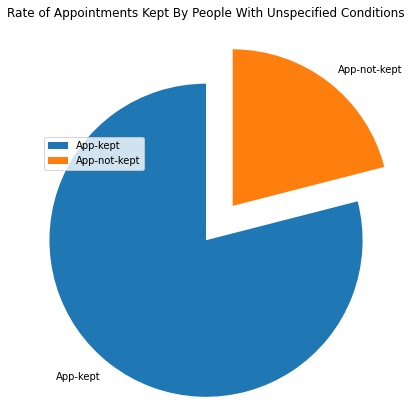

In [75]:
App_0 = dfc_0.value_counts(normalize=True).mul(100).round()
Pies = ["App-kept", "App-not-kept"]


plt.title("Rate of Appointments Kept By People With Unspecified Conditions", y=1.5)
plt.axis('equal'); 
explode = (0, 0.5)
plt.pie(App_0, radius=1.8, labels = Pies, startangle = 90, explode=explode)
plt.legend(Pies, loc="best");

>- *79 percent of unspecified medical conditions kept their appointments. 21 percent did not.*

### 5. Which of the conditions had the highest number of sufferers?

In [76]:
dfc_high = df_app[["Diabetes", "Hypertension", "Alcoholism", "Handicap"]]

*To answer this, we first create a subset of all 4 conditions and pass it to a new dataframe(dfc_high). Thereafter, we'll attempt to get sum of each variable and compare to ascertain which is highest.*

In [77]:
dfc_high.sum() # Sum up digits in each category...

Diabetes         7943
Hypertension    21801
Alcoholism       3360
Handicap         2093
dtype: int64

*Apparently, hypertension came highest with 21801! Lets run a visual for that...* 

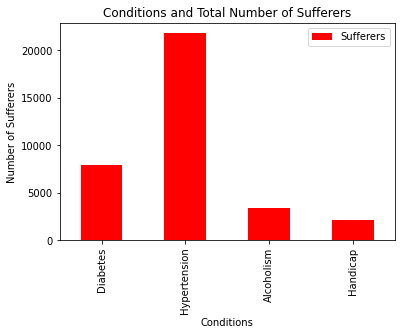

In [78]:
hint_high = ["Sufferers"]
plt.title('Conditions and Total Number of Sufferers')
plt.xlabel('Conditions')
plt.ylabel('Number of Sufferers')
dfc_high.sum().plot(kind='bar', color='red')
plt.legend(hint_high, loc='best')

>- *Hypertension had the highest number of sufferers with 21801 sufferers*

<a id='conclusions'></a>
## Conclusions

> **Findings**: 
>
>- 79.8 percent of the people kept their appointments. 20.2 percent didn't.
>- A longer or shorter wait time can predict whether or not a patient would keep his/her Doctor's appointment.
>- Patients that suffer more than 1 medical condition did not rate higher on keeping appointments than those that suffered less.
>- There is, however, a decline in rate of appointments kept by patients that suffered 4 conditions.
>- Patients with unspecified medical conditions did not have a higher rate of keeping Doctor's appointments than those with recorded conditions.
>- Hypertension had the highest number of sufferers.
>
> **Limitations**:
> 
>- The sample size for people with 3 and 4 medical conditions is just too small.
>- Better analysis could be achieved if only we had more data that could help us acertain reasons for long wait times.
>- PatientId provides us no useful information.
